# CSC 890: Advanced Artificial Intelligence

## Who

- Instructor: Dan Huang

## What is in this Class?

### Incomplete AI Taxonomy

Source: ai-stars
![ai-taxonomy.png](ai-taxonomy.png)

### Where we are in the Taxonomy

![ai-taxonomy-here.png](ai-taxonomy-here.png)

### Machine learning paradigms that we will not cover

1. Unsupervised learning: how to learn from unlabeled data.
2. Reinforcement learning: how to learn from rewards.

### What will we focus on?

Regression techniques that are applicable to scientific problems involving energy surfaces.

### Why only regression?

1. Regression, i.e., supervised learning, has many applications in computer vision, natural language processing, image analysis.
2. Learning the techniques of regression well will be beneficial for many other applications.

### Why scientific problems involving energy surfaces?

It's useful
1. Computational chemistry uses potential energy surfaces to study chemical reactions on a computer.
2. Drug developers can use energy surfaces to design and discover drugs.
3. Materials scientists use energy surfaces to discover new materials.

Young field of research! This means that there are plenty of opportunities to discover and explore.

#### Alpha Fold

![protein-fold.png](protein-fold.png)

## How

Part I: Foundations
- 2 homeworks (30%, 15% each, weeks 1 - 6)

Part II: Research Foundations
- Research Paper Discussion (40%, weeks 7 - 14)
- Individual Final Project (30%, week 15)

# Lec 01: Linear Algebra and Linear Regression

# Linear Algebra Review

## Vector Space

- Why vector space? It forms the foundation of representing data in many ML/AI applications.
- Linear algebra works on the abstraction of a vector space.

### Why Vector Space?

- An example of a vector space is Euclidean space, e.g., $\mathbb{R}^3$.
- However there are many examples of vector spaces that are not Euclidean space, e.g., the space of linear functionals. These more abstract spaces are necessary for more advanced ML/AI models.

### Vector space abstractly

Definition: a **vector space** is a tuple $(V, +, \cdot)$.
1. A **set** $V$ whose elements are called **vectors**.
2. An **addition function** $+: V \times V \rightarrow V$.
    - This function is often written in **infix** notation as $v + w$ instead of $+(v, w)$ where $v, w \in V$.
3. A **scalar multiplication** function $\cdot: \mathbb{R} \times V \rightarrow V$.
    - This function is often written by juxtaposition as $cv$ instead of $c \cdot v$.

This tuple $(V, +, \cdot)$ satisfies certain properties.

#### 1. Addition is "well-behaved"

1. **associativity**: (u + v) + w = u + (v + w)
2. **commutativity**: u + v = v + u
3. **identity**: There is an element called $0$ such that $0 + v = v$.
4. **inverse**: There is an element called $-v$ associated with any $v$ such that $v + (-v) = 0$. We can abbreviate this as $v - v = 0$.

#### 2. Scalar multiplication is "well-behaved"

1. **compatability**: $ab \cdot v = a \cdot (b \cdot v)$
2. **identity**: $1 \cdot v = v$
3. **distributivity scalar multiplication**: $c \cdot (u + v) = cu + cv$
4. **distributivity scalar addition**: $(a + b) \cdot u = au + bu$

### Example: real line forms a vector space

The tuple $(\mathbb{R}, +, \cdot)$ where
1. $+$ is addition on real numbers
2. $\cdot$ is multiplication on real numbers
is a vector space.

We need to check that the addition and scalar multiplication are well behaved.

Addition is "well-behaved":
1. Real addition is associative.
2. Real addition is commutative.
3. The real number $0$ is an identity.
4. For any real number $r$, $-r$ is the inverse.

Scalar multiplication is "well-behaved":
1. $(ab) \cdot r = a \cdot (b \cdot r)$ because real multiplication is associative.
2. The real number $1$ is an identity.
3. $c(u + v) = cu + cv$ because real multiplication.
4. $(a + b)u = au + bu$ because 3 holds and commutativity.

### Example: real plane forms a vector space

The tuple $(\mathbb{R}^2, +, \cdot)$ where
1. $+$ is component-wise addition on reals, i.e.,
    - $(a_1, a_2) + (b_1, b_2) = (a_1 + b_1, a_2 + b_2)$
2. $\cdot$ is component-wise multiplication on real numbers
    - $c \cdot (a_1, a_2) = (c a_1, c a_2)$
is a vector space.

### Example: Euclidean space forms a vector space

The tuple $(\mathbb{R}^D, +, \cdot)$ for any natural number $D$ where
1. $+$ is component-wise addition on reals, i.e.,
    - $(a_1, \dots, a_D) + (b_1, \dots, b_D) = (a_1 + b_1, \dots, a_D + b_D)$
2. $\cdot$ is component-wise multiplication on real numbers
    - $c \cdot (a_1, a_D) = (c a_1, \dots, c a_D)$
is a vector space.

### Summary

- Looked at the formal definition of a vector space (over reals).
    - The **field** that the vector space is over is not always the real field.
- Looked at a few examples of a vector spaces.
- Euclidean space will be most important example of a vector space in this course.

## Let's make this computational!

In [2]:
import numpy as np               # popular library for numerical computation
import matplotlib.pyplot as plt  # popular library for ploting in Python

### Real Plane

One nice aspect of working with the real plane is that we can draw vectors.

In [3]:
def draw_vecs(vecs):
    V = []
    origin_x = []
    origin_y = []
    for x in vecs:
        if type(x) is tuple:
            V += [x[1]]
            origin_x += [x[0][0]]
            origin_y += [x[0][1]]
        else:
            V += [x]
            origin_x += [0]
            origin_y += [0]
    V = np.array(V)
    origin = np.array([origin_x, origin_y])
    W = V + np.transpose(origin)
    plt.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', color=['r', 'g', 'b'], scale=1)
    x_scale = .1 * (np.max(W[:,0]) - min(0, np.min(W[:,0])))
    y_scale = .1 * (np.max(W[:,1]) - min(0, np.min(W[:,1])))
    plt.xlim(min(0, np.min(W[:,0])) - x_scale, np.max(W[:,0]) + x_scale)
    plt.ylim(min(0, np.min(W[:,1])) - y_scale, np.max(W[:,1]) + y_scale)

In [4]:
vec1 = np.array([1., 2.])   # D = 2
vec1

array([1., 2.])

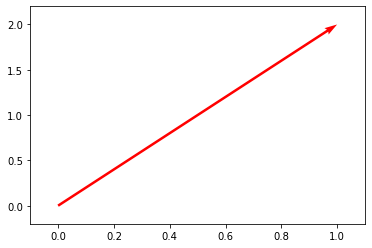

In [5]:
draw_vecs([vec1])

In [6]:
vec2 = np.array([2.3, 1.4])   # D = 2
vec2

array([2.3, 1.4])

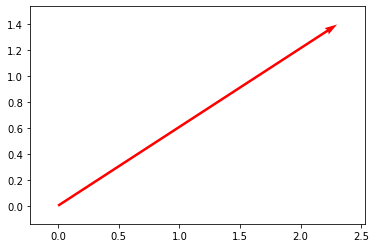

In [7]:
draw_vecs([vec2])

#### Adding vector

In [8]:
print("vec1", vec1)
print("vec2", vec2)
vec1 + vec2    # note the component-wise addition

vec1 [1. 2.]
vec2 [2.3 1.4]


array([3.3, 3.4])

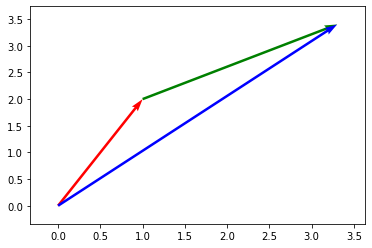

In [9]:
draw_vecs([vec1, (vec1, vec2), vec1 + vec2])

#### Scaling vector

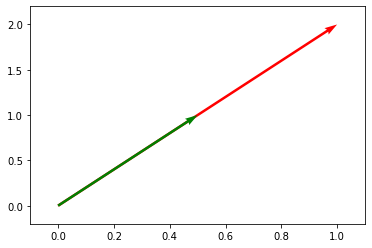

In [10]:
draw_vecs([vec1, .5*vec1])

### Aside: floating-point vs. real

1. On pencil-paper, we use abstractions like real numbers which we can represent as an infinite sequence of digits.
2. On computer, we use abstractions like **floating point** that we use to model real numbers with a finite sequence of digits.
3. These are not the same thing and shows a discrepancy between what is done on pencil-paper and what is done on a computer. 

$1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 = 1$ on the reals

In [11]:
x = 1./9 + 1./9 + 1./9 + 1./9 + 1./9 + 1./9 + 1./9 + 1./9 + 1./9
x

1.0000000000000002

In [12]:
x == 1.

False

- Takeaway: it is important to keep the discrepancy between the two representations in mind.
- In practice, we use floating-point because the underlying computer hardware has special arithmetic units for computing on floating-point.
- Every now and then we will run into "corner-cases", i.e., cases where the mathematics works out and the computer implementation doesn't. And cases where the computer implementation "works" but the mathematics is ill-defined.

### Back to Real Plane

In [13]:
vec1, vec2

(array([1., 2.]), array([2.3, 1.4]))

In [14]:
3. * vec1      # note the component-wise multiplication

array([3., 6.])

In [15]:
3. * (vec1 + vec2)

array([ 9.9, 10.2])

In [16]:
3. * vec1 + 3. * vec2

array([ 9.9, 10.2])

In [17]:
# We can check distribution of scalar-multiplication (modulo floating-point complexities)
3. * (vec1 + vec2) == 3. * vec1 + 3. * vec2

array([ True,  True])

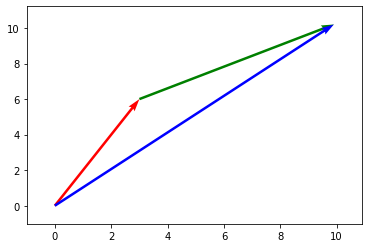

In [18]:
# 1: Multiplying first then adding
draw_vecs([3.*vec1, (3.*vec1, 3.*vec2), 3.*vec1 + 3.*vec2])

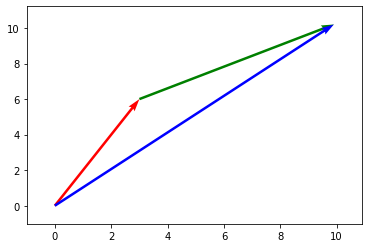

In [19]:
# 2: Adding then multiplying
draw_vecs([3.*vec1, (3.*vec1, 3.*vec2), 3.*(vec1 + vec2)])

## Summary

1. Vectors and vector spaces are formally defined objects that are entirely abstract.
2. We can manipulate vectors using `numpy`.
3. An example of a vector space is Euclidean space which is the most important example.
4. In $\mathbb{R}^2$ and $\mathbb{R}^3$, we can imagine vectors as arrows of the appropriate length and direction, but this is not what a vector is.

## Linear Independence, Span, Basis

1. Previously we saw the definition of a vector space which was this "bag" of vectors satisfying some properties.
2. Now we want to see if there is a more tractable way to get a handle on this "bag" of vectors.
3. This is where the idea of linear independence, span, and basis come into play.

### Linear Combination

Definition: a **linear combination** of a set of vectors $\{v_1, \dots, v_n\}$ is any vector
$$
c_1 v_1 + \dots + c_n v_n 
$$
for any choice of scalars $c_1, \dots, c_n$.

The above vector can also be written as
$$
\sum_{i=1}^n c_i v_i \,.
$$

### Linear Independence

Definition: a set of vectors $\{v_1, \dots, v_n\}$ is **linearly independent** if there is no linear combination of $\{v_1, \dots, v_n\}$ (with non-zero scalars) such that 
$$
\sum_{i=1}^n c_i v_i = 0 \,.
$$

Intuitively, a set of vectors is linearly independent if we cannot determine the "origin".

### Span

Definition: a set of vectors $\{v_1, \dots, v_n\}$ is **spans** the vector space $V$ if every vector can be written as a linear combination of $\{v_1, \dots, v_n\}$.

### Basis

Definition: a set of vectors $\{v_1, \dots, v_n\}$ is said to be a **basis** for a vector space $V$ if $\{v_1, \dots, v_n\}$
1. linearly independent
2. and spans the vector space

### Takeaway

1. We can reduce our understanding of a vector space to linear combinations of a basis!
2. This pattern of taking a complex space and identifying a smaller subset with an operation (or operations) that lets us build more complex things out of it is a re-occuring theme in science and mathematics.

### Example: Real plane

Let's look at the definitions in the case of $\mathbb{R}^2$.

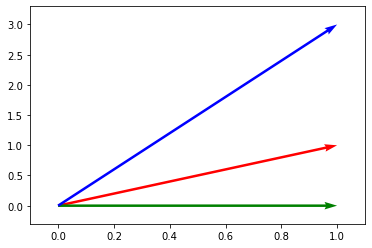

In [20]:
# Is this collection linearly independent?
vectors1 = [[1, 1], [1, 0], [1, 3]]
draw_vecs(vectors1)

`vectors1` is not linearly independent, spans $\mathbb{R}^2$, and is not a basis

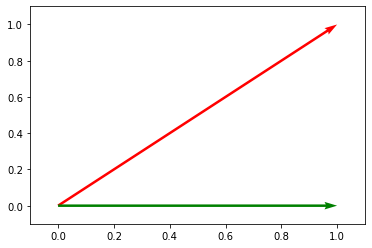

In [21]:
# Is this collection linearly independent?
vectors2 = [[1, 1], [1, 0]]
draw_vecs(vectors2)

`vectors2` is linearly independent, spans $\mathbb{R}^2$, and is a basis

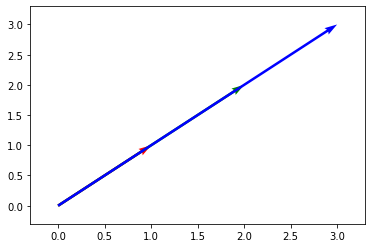

In [22]:
# Is this collection linearly independent?
vectors3 = [[1, 1], [2, 2], [3, 3]]
draw_vecs(vectors3)

`vectors3` is not linearly independent, does not span $\mathbb{R}^2$, and is not a basis

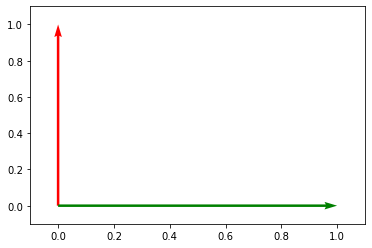

In [23]:
# Is this collection linearly independent?
vectors4 = [[0, 1], [1, 0]]
draw_vecs(vectors4)

`vectors4` is linearly independent, spans $\mathbb{R}^2$, and is a basis known as the **standard basis**

1. You may be wondering if there is a way to check if we have a basis.
2. Hold that thought!
3. There is, but we need to introduce a few more concepts first.

## Linear Maps and Matrices

- Vector spaces gave us the data.
- We now want to define "functions" on this data.
- Linear maps and matrices are these "functions". 
- We'll introduce linear maps first, then the connection with matrices, and finally the computational version.

### Linear Map

A map $f: V \rightarrow W$ between two vector spaces $V$ and $W$ is a **linear map** if
1. f(u + v) = f(u) + f(v)
2. f(cv) = cf(v)

#### Example 1: Linear Map

In [24]:
def f(x):
    return 3. * x + x

print("Add then function", f(vec1 + vec2), "function then add", f(vec1) + f(vec2))
print("Scale then function", 2. * f(vec1), "function then scale", 2. * f(vec1))

Add then function [13.2 13.6] function then add [13.2 13.6]
Scale then function [ 8. 16.] function then scale [ 8. 16.]


#### Example 2: Non-Linear Map

In [25]:
def g(x):
    return np.exp(3. * x + x)

print("Add then function", g(vec1 + vec2), "function then add", g(vec1) + g(vec2))
print("Scale then function", 2. * g(vec1), "function then scale", 2. * g(vec1))

Add then function [540364.93724669 806129.75912399] function then add [9951.72720878 3251.38439447]
Scale then function [ 109.19630007 5961.91597408] function then scale [ 109.19630007 5961.91597408]


#### Example 3: Linear Map

In [26]:
def h(x):
    theta = 90. * np.pi/180
    return np.array(
        [
            x[0] * np.cos(theta) - x[1] * np.sin(theta),
             x[0] * np.sin(theta) + x[1] * np.cos(theta)
        ])
    
print("Add then function", h(vec1 + vec2), "function then add", h(vec1) + h(vec2))
print("Scale then function", 2. * h(vec1), "function then scale", 2. * h(vec1))

Add then function [-3.4  3.3] function then add [-3.4  3.3]
Scale then function [-4.  2.] function then scale [-4.  2.]


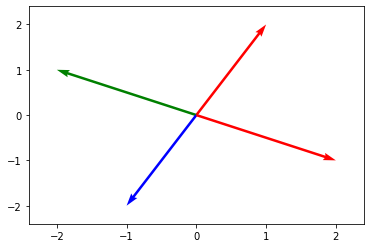

In [27]:
draw_vecs([vec1, h(vec1), h(h(vec1)), h(h(h(vec1)))])

### Aside: Partial Application

Add then function [-0.07071068  4.73761543] function then add [-0.07071068  4.73761543]
Scale then function [-1.41421356  4.24264069] function then scale [-1.41421356  4.24264069]


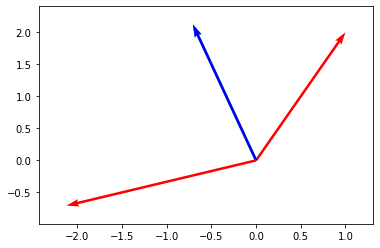

In [28]:
def h_p(angle, x):
    theta = angle * np.pi/180
    return np.array(
        [
            x[0] * np.cos(theta) - x[1] * np.sin(theta),
             x[0] * np.sin(theta) + x[1] * np.cos(theta)
        ])
    
from functools import partial
angle = 45
h2 = partial(h_p, angle)
print("Add then function", h2(vec1 + vec2), "function then add", h2(vec1) + h2(vec2))
print("Scale then function", 2. * h2(vec1), "function then scale", 2. * h2(vec1))
draw_vecs([vec1, h2(vec1), h2((vec1)), h2(h2(h2(vec1)))])

### Where do Matrices Come In?

1. As a reminder, we had the question of how to get a tractable hold on the vectors in a vector space.
2. The solution was a basis.
3. Similarly, we might have a similar question: is there a tractable hold on linear maps?
4. The solution to this is a **matrix**.

#### Example: 2x2 Matrix

$$
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
$$

In [29]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

#### Example: 2x3 Matrix

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
$$

In [30]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

#### Example: nxm Matrix

$$
\begin{pmatrix}
a_{11} & \dots & a_{1m} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nm}
\end{pmatrix}
$$

In [31]:
np.zeros((3, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Matrix Multiplication

$$
\begin{pmatrix}
a_{11} & \dots & a_{1m} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nm}
\end{pmatrix}
\begin{pmatrix}
b_{11} & \dots & b_{1k} \\
\vdots & \ddots & \vdots \\
b_{m1} & \dots & b_{mk}
\end{pmatrix} = 
\begin{pmatrix}
\sum_{i=1}^m a_{1i}b_{i1} & \dots & \sum_{i=1}^m a_{1i}b_{ik} \\
\vdots & \ddots & \vdots \\
\sum_{i=1}^m a_{ni}b_{i1} & \dots & \sum_{i=1}^m a_{ni}b_{ik}
\end{pmatrix}
$$

In [32]:
np.array([[1, 2], [3, 4]]) @ vec1

array([ 5., 11.])

In [33]:
np.array([[1, 2], [3, 4]]) @ np.array([[1, 2], [3, 4]])

array([[ 7, 10],
       [15, 22]])

### Matrix Multiplication: View 2

Each column is a linear combination of the left matrix columns using the right matrix columns as the coefficients.

$$
\begin{pmatrix}
a_{11} & \dots & a_{1m} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nm}
\end{pmatrix}
\begin{pmatrix}
b_{1j} \\
\vdots \\ 
b_{mj}
\end{pmatrix} = 
\begin{pmatrix}
b_{1j}
\begin{pmatrix}
a_{11} \\
\vdots \\
a_{n1}
\end{pmatrix} +
\dots +
b_{mj}
\begin{pmatrix}
a_{1m} \\
\vdots \\
a_{nm}
\end{pmatrix}
\end{pmatrix}
$$

In [34]:
np.array([[1, 2], [3, 4]]) @ vec1, np.array([1, 3]) * vec1[0] + np.array([2, 4]) * vec1[1]

(array([ 5., 11.]), array([ 5., 11.]))

In [35]:
print(np.array([[1, 2], [3, 4]]) @ np.array([[1, 2], [3, 4]]))
np.concatenate([(np.array([1, 3]) * 1 + np.array([2, 4]) * 3).reshape(2, -1),
                (np.array([1, 3]) * 2 + np.array([2, 4]) * 4).reshape(2, -1)], axis=1)

[[ 7 10]
 [15 22]]


array([[ 7, 10],
       [15, 22]])

### Linear Maps and Matrices

Theorem: every linear map can be represented as a matrix in some arbitrary choice of basis

#### Example 1

In [36]:
def f(x):
    return 3. * x + x

def f_matrix(x):
    matrix = (3. * np.eye(x.shape[0]) + np.eye(x.shape[0]))  # representation of linear map
    return matrix @ x  # matrix multiplication, i.e., applying a linear map
    
print(f(vec1), f_matrix(vec1))
print(f(vec2), f_matrix(vec2))

[4. 8.] [4. 8.]
[9.2 5.6] [9.2 5.6]


#### Example 2

In [37]:
def h(x):
    theta = 90. * np.pi/180
    return np.array(
        [
            x[0] * np.cos(theta) - x[1] * np.sin(theta),
             x[0] * np.sin(theta) + x[1] * np.cos(theta)
        ])

def h_matrix(x):
    theta = 90. * np.pi/180
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])  # representation of linear map
    return R @ x  # matrix multiplication, i.e., applying a linear map
    
print(h(vec1), h_matrix(vec1))
print(h(vec2), h_matrix(vec2))

[-2.  1.] [-2.  1.]
[-1.4  2.3] [-1.4  2.3]


#### Summary

1. Every linear map can be represented with a matrix.
2. The application of a linear map is given by matrix multiplication. That is, if $f$ is a linear map and $M$ is a matrix representing $f$, then $f(x) = Mx$.

## Solving a System of Linear Equations

### Example

Find $x_1$ and $x_2$ such that both equations hold
\begin{align}
1x_1 + 2x_2 & = 3 \\
2x_1 + 3x_2 & = 5
\end{align}

### View 1: System of Linear Equations

1. Double
\begin{align*}
2x_1 + 4x_2 & = 6 \tag{double} \\
2x_1 + 3x_2 & = 5
\end{align*}

2. Eliminate
\begin{align*}
x_2 & = 1 \tag{subtract}
\end{align*}

3. Back-substitute
\begin{align*}
1x_1 + 2 = 3 \tag{back-substitute}
\end{align*}

4. Simplify
\begin{align*}
x_1 = 1 \tag{simplify}
\end{align*}

5. Solution, x_1 = 1 and x_2 = 1

#### Solution as intersection of "hyper-planes"

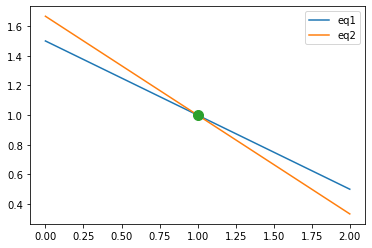

In [38]:
xs = np.linspace(0, 2)
eq1 = np.array([(3 - x) / 2 for x in xs])
eq2 = np.array([(5 - 2*x) / 3 for x in xs])
plt.plot(xs, eq1, label='eq1')
plt.plot(xs, eq2, label='eq2')
plt.plot([1], [1], marker='o', markersize=10)
plt.legend()

### View 2: Matrix

$$
A = \begin{pmatrix}
1 & 2 \\
2 & 3 
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
3 \\
5
\end{pmatrix}
$$

$$
x = \begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
$$

Solve
$$
Ax = b
$$
for x.

#### How do we do this?

1. Recall matrix multiplication uses a linear combination of the columns of A using the coefficients $x_1, x_2$.
2. So we need to find the coefficients $x_1$ and $x_2$ that add up to $b$

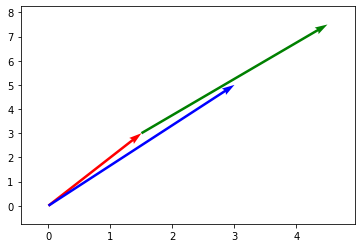

In [39]:
A = np.array([[1, 2], [2, 3]])
b = np.array([3, 5])
col1 = A[0,:]
col2 = A[1,:]

x1 = 1.5 # Adjust until the vectors add up to b
x2 = 1.5 # Adjust until the vectors add up to b
draw_vecs([x1*col1, (x1*col1, x2*col2), b])

### Summary

1. View 1: each row of the A matrix is a hyper-plane. Find the intersection of the hyper-planes.
2. View 2: each column of the A matrix is a vector. Find a linear combination of the columns that up to b.
3. These views are equivalent.
4. In a linear algebra course, you might spend a lot of time solving these equations. In this class, we'll just use `numpy`.

### Numpy implementation

In [40]:
A = np.array([[1, 2], [2, 3]])
b = np.array([3, 5])

# Solving Ax = b for x and storing in variable x
x = np.linalg.solve(A, b)
x

array([1., 1.])

### Generalization to 3 dimensions

In [41]:
A = np.array([[1, 2, 1], [1, -3, 1], [1, -1, -1]])
b = np.array([5, 0, -2])

# Solving Ax = b for x and storing in variable x
x = np.linalg.solve(A, b)
x

array([1., 1., 2.])

### Generalization to D dimensions

There's nothing stopping us from getting to $D$ dimensions.

$$
\begin{pmatrix}
a_{11} & \dots & a_{1D} \\
\vdots & \ddots & \vdots \\
a_{D1} & \dots & a_{DD} \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\
\vdots \\
x_D
\end{pmatrix} = 
\begin{pmatrix}
b_1 \\
\vdots \\
b_D
\end{pmatrix}
$$

### Questions you may have

1. What happens when you don't have D equations in D unknowns?
2. Enough linear algebra -- what can we do with it?

### Enter machine learning and the supervised learning task of regression

- Linear algebra has enormous number of applications beyond regression.

# Linear Regression

- Linear regression is the foundation for all regression tasks.
- Linear regression deals with the problem of fitting a line to a collection of points.
- This collection of points comes from a "real-life" dataset.

## Example: 1 Dimension and 3 Points

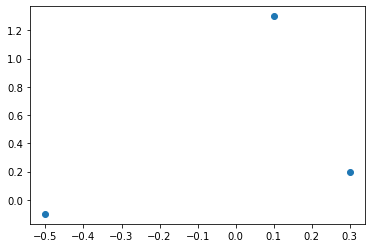

In [42]:
x1 = [0.3]                     # each point has dimension 1
x2 = [-0.5]               
x3 = [.1]                
b = [0.2, -.1, 1.3]
X = np.array([x1, x2, x3])   # each row is one point

plt.plot(X[:,0], b, marker='o', linestyle='none')

In [70]:
X.shape

(3, 1)

## Question: Can you fit a line through these points?

No! I can't exactly fit a line through these points.
1. Follow up question: If I relax to the problem of fitting a line through these points approximately, what is the best approximation?
2. Follow up question: Do I have to fit a line? Can I fit a curve?

Today: Define a notion of best approximation and show how to find the solution

## Best Approximation?

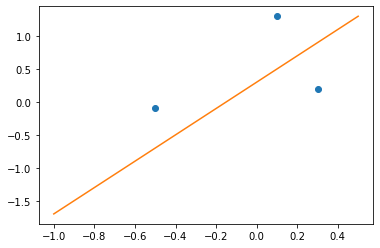

In [43]:
x = [2, .3]  # How should we choose x so that this line is the "best approximation"?

plt.plot(X[:,0], b, marker='o', linestyle='none')
plt.plot(np.linspace(-1, .5), [x0 * x[0] + x[1] for x0 in np.linspace(-1, .5)])

### Hypothetical reasoning 1

If we could fit a line through all three points, we can cast the problem as solving the set of linear equations

\begin{align*}
.3 \hat{x}_1 + \hat{x}_2 & = 0.2 \\
-.5 \hat{x}_1 + \hat{x}_2 & = -.1 \\
-.1 \hat{x}_1 + \hat{x}_2 & = 1.3 \\
\end{align*}

for the unknowns $\hat{x}_1$ and $\hat{x}_2$

### Hypothetical reasoning 2

We can gather this into the matrix equation
$$
A\hat{x} = b
$$
where

$$
A = \begin{pmatrix}
.3 & 1 \\
-.5 & 1 \\
-.1 & 1
\end{pmatrix} \,,
$$
,
$$
\hat{x} = \begin{pmatrix}
\hat{x}_1 \\
\hat{x}_2
\end{pmatrix} \,,
$$
and
$$
b = \begin{pmatrix}
0.2 \\
-.1 \\
1.3
\end{pmatrix} \,.
$$

In [44]:
A = np.concatenate([X, np.ones((3,1))], axis=1)
A, b

(array([[ 0.3,  1. ],
        [-0.5,  1. ],
        [ 0.1,  1. ]]),
 [0.2, -0.1, 1.3])

In [45]:
# What happens if you try to solve?
try:
    np.linalg.solve(A, b)
except Exception as err:
    print(err)  # numpy won't even let you try to solve this system of equations

Last 2 dimensions of the array must be square


### Hypothetical reasoning 3

The equation above is equivalent to saying
$$
\hat{x}_1 \begin{pmatrix}
0.3 \\
-0.5 \\
0.1
\end{pmatrix}
+
\hat{x}_2 \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}
=
b \,.
$$
In other words, the choice of $\hat{x}_1$ and $\hat{x}_2$ give us a linear combination of the columns of $A$.

### Hypothetical reasoning 4

1. We can't fit a line (hyper-plane) directly through the points.
2. Let's do this approximately by choosing the best $\hat{x}_1$ and $\hat{x}_2$ so that the "error" is minimized.
3. In Euclidean geometry, this corresponds to choosing a "perpendicular" vector.
4. We'll need to define error and "perpendicular" formally now.

#### Residual (Error)

The **residual** or the error vector for some solution $x$ is the vector
$$
\epsilon_\hat{x} = 
\begin{pmatrix}
.3 & 1 \\
-.5 & 1 \\
-.1 & 1
\end{pmatrix}
\hat{x} - 
\begin{pmatrix}
0.2 \\
-.1 \\
1.3
\end{pmatrix}
$$

#### Graphic of Residual

In [46]:
# Make matrix
A = np.concatenate([X, np.ones((3,1))], axis=1)
A, b

(array([[ 0.3,  1. ],
        [-0.5,  1. ],
        [ 0.1,  1. ]]),
 [0.2, -0.1, 1.3])

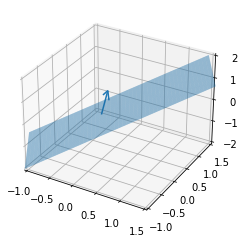

In [47]:
def draw_columns(A):
    # Construct all linear combinations of columns of A
    hat_x1, hat_x2 = np.meshgrid(np.linspace(-1, 1.5), np.linspace(-1, 1.5))
    x = np.zeros(hat_x1.shape)
    y = np.zeros(hat_x1.shape)
    z = np.zeros(hat_x1.shape)
    for i in range(hat_x1.shape[0]):
        for j in range(hat_x2.shape[0]):
            # Constructing a linear combination of columns of A
            vec = hat_x1[i][j] * A[:,0] + hat_x2[i][j] * A[:,1]
            x[i][j] = vec[0]
            y[i][j] = vec[1]
            z[i][j] = vec[2]

    # Plotting
    ax = plt.axes(projection='3d')
    ax.set_xlim([-1, 1.5])
    ax.set_ylim([-1, 1.5])
    ax.set_zlim([-2, 2])

    ax.plot_surface(x, y, z, alpha=0.5)   # plot linear combinations of columns of A
    return ax
    
ax = draw_columns(A)
ax.quiver(0, 0, 0, b[0], b[1], b[2])  # plot targets

#### Orthogonality (Perpendicular) and Dot Product

The dot product of two vectors is
$$
(a_1, \dots, a_D) \cdot (b_1, \dots, b_D) = a_1b_1 + \dots + a_D b_D
$$

### Example

In [48]:
vec1 = np.array([0, 1])
vec2 = np.array([1, 0])
vec3 = np.array([1./np.sqrt(2), 1./np.sqrt(2)])

In [49]:
vec1[0] * vec2[0] + vec1[1] * vec2[1], np.dot(vec1, vec2)

(0, 0)

In [50]:
vec1[0] * vec3[0] + vec1[1] * vec3[1], np.dot(vec1, vec3)

(0.7071067811865475, 0.7071067811865475)

In [51]:
vec2[0] * vec3[0] + vec2[1] * vec3[1], np.dot(vec2, vec3)

(0.7071067811865475, 0.7071067811865475)

### Geometric Intuition

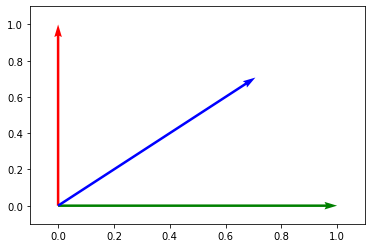

In [52]:
draw_vecs([vec1, vec2, vec3])

#### Dot product gives us cosine of angle

$$
a \cdot b = cos(\theta)
$$
where $\theta$ is the angle between vectors a and b

In [53]:
print("Angle in degrees", np.arccos(np.dot(vec1, vec2)) * 180/np.pi)
print("Angle in degrees", np.arccos(np.dot(vec1, vec3)) * 180/np.pi)
print("Angle in degrees", np.arccos(np.dot(vec2, vec3)) * 180/np.pi)

Angle in degrees 90.0
Angle in degrees 45.00000000000001
Angle in degrees 45.00000000000001


#### So dot product of 0 gives us orthogonality

Two vectors are **orthogonal** if their dot product is 0.

### Chain-of-reasoning 4

We want the angle between the residual to be orthogonal to
$$
\begin{pmatrix}
.3 \\
-.5\\
-.1
\end{pmatrix}
$$
and
$$
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}
$$.

In other words,
$$
\begin{pmatrix}
.3 \\
-.5\\
-.1
\end{pmatrix}
 \cdot \epsilon_x = 0
$$
and
$$
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}
 \cdot \epsilon_x = 0
$$

We can gather this into the matrix equation

$$
\begin{pmatrix}
.3 & -.5 & -.1 \\
1 & 1 & 1
\end{pmatrix}
\epsilon_x = 
\begin{pmatrix}
0 \\
0
\end{pmatrix}
$$

### Aside: Transpose of a Matrix


The **transpose** of a matrix is
$$
\begin{pmatrix}
a_{11} \dots a_{1n} \\
\vdots \ddots \vdots \\
a_{n1} \dots a_{mn}
\end{pmatrix}^T = 
\begin{pmatrix}
a_{11} \dots a_{n1} \\
\vdots \ddots \vdots \\
a_{1n} \dots a_{mn}
\end{pmatrix}
$$

## Normal Equations

More generally
$$
A^T (Ax - b) = 0
$$
or equivalently
$$ 
A^TAx = A^Tb
$$
or equivalently
$$ 
x = (A^TA)^{-1} A^Tb
$$

## How do we solve it?

### Implementation Strategy 1

$$ 
x = (A^TA)^{-1} A^Tb
$$

In [67]:
A = np.concatenate([X, np.ones((3,1))], axis=1)
A

array([[ 0.3,  1. ],
       [-0.5,  1. ],
       [ 0.1,  1. ]])

In [68]:
b

[0.2, -0.1, 1.3]

In [55]:
x = np.linalg.inv(A.transpose() @ A) @ A.transpose() @ b
x

array([0.82692308, 0.49423077])

### Implementation Strategy 2

Solve
$$ 
(A^TA)x = A^Tb
$$
for x.

In [56]:
np.linalg.solve(A.transpose() @ A, A.transpose() @ b)

array([0.82692308, 0.49423077])

## Aside: Math vs. Computation

1. Strategy 1 and strategy 2 both give us the same answer (thankfully).
2. However, they have different computational properties.
3. For example, matrix inversion is less stable than solving a system of linear equations.
4. So strategy 2 is preferred over 1.
5. Both matrix inversion and solving a system of linear equations have cubic complexity in the dimensions of the matrix. So this is a costly operation!

## Practice

1. Let's try this on a real dataset!
2. We'll use the UCI ML data repository which contains many datasets.
3. In particular, we'll focus on just one dataset that contains some data: [https://archive.ics.uci.edu/ml/datasets/KEGG+Metabolic+Relation+Network+%28Directed%29](https://archive.ics.uci.edu/ml/datasets/KEGG+Metabolic+Relation+Network+%28Directed%29)

### Step 1: Get Data

In [59]:
# Some code to download the data once if you don't already have it
from tqdm.notebook import trange, tqdm
import requests
from os.path import exists

if not exists("./Relation Network (Directed).data"):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00220/Relation%20Network%20(Directed).data"
    response = requests.get(url, stream=True)

    with open("./data/Relation Network (Directed).data", "wb") as f:
        for data in tqdm(response.iter_content()):
            f.write(data)

### Step 2: Read Data

In [60]:
import pandas as pd

df = pd.read_csv('Relation Network (Directed).data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,aac00010,26,43,2,7,1,211,3.222749,3.230769,0,...,27.000000,0,0.076923,3.307692,0.062418,1.653846,3.923077,0.375199,2.210114,0.221154
1,aac00020,27,52,2,10,1,226,3.411504,3.851852,0,...,26.629630,0,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197
2,aac00030,26,53,2,6,1,202,2.732673,3.769231,0,...,14.961538,0,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311
3,aac00040,20,28,1,8,1,65,2.523077,2.600000,0,...,4.950000,0,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000
4,aac00051,15,33,1,4,2,85,1.858824,4.400000,0,...,5.000000,0,0.000000,4.400000,0.026740,2.200000,2.333333,0.518691,1.532326,0.267222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53408,zmo00770,20,25,2,5,1,62,2.112903,2.500000,0,...,5.550000,0,0.000000,2.500000,0.043910,1.250000,1.650000,0.377880,1.077955,0.157500
53409,zmo00780,4,3,1,3,1,6,1.666667,1.500000,0,...,1.000000,0,0.000000,1.500000,0.166667,0.750000,1.500000,0.541667,1.125000,0.000000
53410,zmo00785,5,6,1,3,1,10,1.500000,2.400000,0,...,1.000000,0,0.000000,2.400000,0.083333,1.200000,1.600000,0.593333,1.150000,0.166667
53411,zmo00790,16,24,3,4,1,39,1.666667,2.250000,0,...,2.250000,0,0.250000,2.500000,0.018056,1.250000,1.375000,0.454412,0.923438,0.188542


### Step 3: Explore Data

In [61]:
def column_info(column: int, df: pd.DataFrame) -> {'min': float, 'max': float, 'mean': float, 'std': float}:
    if df[column].dtype == object:
        print("Cannot get statistics of object")
        return None
    
    
    return {
        'min': df[column].min(),
        'max': df[column].max(),
        'mean': df[column].mean(),
        'std': df[column].std(),
    }

In [62]:
print(column_info(0, df))
print(column_info(1, df))
print(column_info(8, df))

Cannot get statistics of object
None
{'min': 2, 'max': 116, 'mean': 14.053395240858967, 'std': 12.718932526109183}
{'min': 1.0, 'max': 14.16393443, 'mean': 2.4440069526840316, 'std': 1.5407816728346586}


### Example 1

Suppose we are regressing column 16 against column 17.

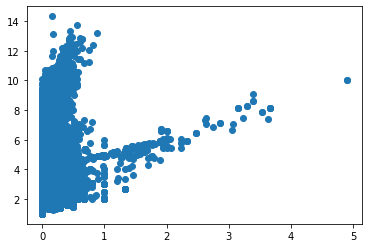

In [63]:
plt.plot(df[16], df[17], marker='o', linestyle='None')

In [64]:
def fit_regression(X, y):
    A = np.concatenate([X, np.ones((X.shape[0],1))], axis=1)
    return np.linalg.solve(A.transpose() @ A, A.transpose() @ y)

Weights [3.14784129 2.31050064]


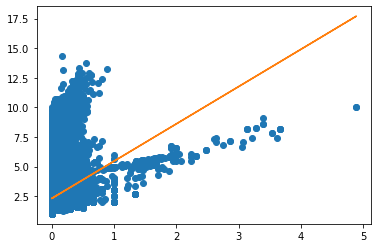

In [65]:
weights = fit_regression(df[16].to_numpy().reshape(-1, 1), df[17].to_numpy())
print("Weights", weights)
predictions = [weights[0] * x + weights[1] for x in df[16].to_numpy()]
plt.plot(df[16], df[17], marker='o', linestyle='None')
plt.plot(df[16], predictions)

### Example 2

Suppose we are regressing column 17 against column 18.

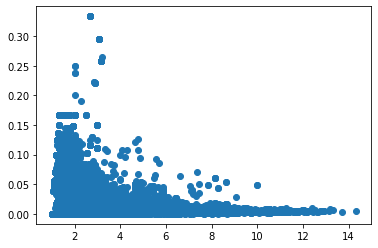

In [63]:
plt.plot(df[17], df[18], marker='o', linestyle='None')

Weights [-0.00289117  0.02733539]


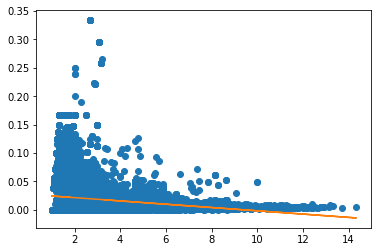

In [64]:
weights = fit_regression(df[17].to_numpy().reshape(-1, 1), df[18].to_numpy())
predictions = [weights[0] * x + weights[1] for x in df[17].to_numpy()]
print("Weights", weights)
plt.plot(df[17], df[18], marker='o', linestyle='None')
plt.plot(df[17], predictions)

### Example 3

If we are using higher-dimensional regression
1. We can't really plot the weights graphically anymore.
2. However, the regression still works due to the linear algebra!

In [65]:
weights = fit_regression(df[[16,17]].to_numpy().reshape(-1, 2), df[18].to_numpy())
print("Weights", weights)
predictions = [weights[0] * x[0] + weights[1] * x[1] + weights[2] for x in df[[16, 17]].to_numpy()]

Weights [ 0.00854496 -0.00326081  0.02772432]


### Loss

- We can measure the difference between the prediction and the actual value by computing the loss.
- One common loss is squared loss:
$$
\text{squared loss} = \sum_{i=1}^N (\hat{y} - y)^2
$$

In [66]:
np.sum((predictions - df[18].to_numpy())**2)

63.72736233081981

## Some questions you may have

1. What's the best loss? (It depends, we'll look at this more.
2. Can we fit any other kind of curve? Yes, this is what neural networks and gaussian processes do.
3. Where does probability and optimization come in? More on this later!

# Summary

1. Review of linear algebra.
2. First introduction to linear regression
3. Next time: probability and Bayesian view of linear regression.